In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
print("Shape of training data:", train_df.shape)
print("Shape of testing data:", test_df.shape)

Shape of training data: (891, 12)
Shape of testing data: (418, 11)


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

For Age, Cabin and Emabrked there are missing values in training set

In [6]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In testing set some of the values for Age and Cabin are missing

In [7]:
train_df[['Pclass','Survived']].groupby(by='Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Clearly Pclass has impact on survival rate. 

In [9]:
train_df[['Sex','Survived']].groupby(by='Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Female passenger has much more survival rate than male

In [10]:
train_df[['Embarked','Survived']].groupby(by='Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [11]:
train_df[['SibSp','Survived']].groupby(by='SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[['Parch','Survived']].groupby(by='Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Below age 3 -> Infants
Age 3 - 16 -> Kids
Age 16 - 60 -> Adults
Age > 60 Old

In [27]:
def get_age_group(age):
    if(age <= 3):
        return 'Infant'
    elif(age > 3 and age <=14):
        return 'Kid'
    elif(age >16 and age < 60):
        return 'Adult'
    else:
        return 'Old'

In [28]:
train_df['Age_Group'] = train_df['Age'].apply(get_age_group)

In [29]:
test_df['Age_Group'] = test_df['Age'].apply(get_age_group)

In [30]:
train_df[['Age_Group','Survived']].groupby(by='Age_Group').sum()/train_df[['Age_Group','Survived']].groupby(by='Age_Group').count()

,Survived
Age_Group,
Adult,0.387755
Infant,0.666667
Kid,0.531915
Old,0.305310


Kids and infants have high survival rate 53% and 66% respectively

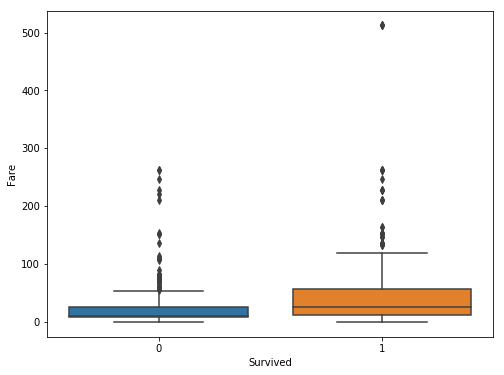

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train_df, x='Survived', y='Fare')

High Fare high chance of survival

# Handling missing values

Cabin column has lots of missing values. We will drop this column. Also from name column we can get information about sex and age which we alrady have. So we will drop this column also

We will clean missing values together for training and testing set

In [41]:
y = train_df['Survived']

KeyError: 'Survived'

In [42]:
train_df.drop('Survived', axis=1, inplace=True)

KeyError: "['Survived'] not found in axis"

In [45]:
df =pd.concat([train_df, test_df], axis=0)

In [46]:
df.shape

(1309, 12)

In [47]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [48]:
df.drop(['Name','Cabin'], axis=1, inplace=True)

In [50]:
df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
Age_Group        0
dtype: int64

In [52]:
df['Fare'].mean()

33.29547928134557

In [54]:
df['Fare'] = df['Fare'].fillna(33.29)

In [55]:
df['Embarked'].mode()

0    S
dtype: object

In [57]:
df['Embarked'] = df['Embarked'].fillna('S')

In [58]:
df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Age_Group        0
dtype: int64

In [59]:
df.drop(['Ticket','Age_Group'], axis=1, inplace=True)

In [60]:
df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

Let's find value to replace missing Age value

In [64]:
df[['Pclass', 'Age']].groupby(['Pclass']).mean()

,Age
Pclass,
1,39.159930
2,29.506705
3,24.816367


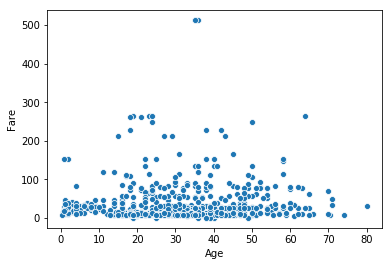

In [65]:
sns.scatterplot(data=train_df, x='Age', y='Fare')

There seems no relation between age and fare

In [101]:
def impute_age(cols):
    age = cols[0]
    pclass=cols[1]
    if(pd.isnull(age)):
        if(pclass == 1):
            return 39
        elif(pclass == 2):
            return 29
        else:
            return 25
    else:
        return age

In [104]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [105]:
df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Coverting Categorical values

In [106]:
df.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [107]:
df['Sex']=df['Sex'].replace({'male':1,'female':0})

In [108]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,S
1,2,1,0,38.0,1,0,71.2833,C
2,3,3,0,26.0,0,0,7.9250,S
3,4,1,0,35.0,1,0,53.1000,S
4,5,3,1,35.0,0,0,8.0500,S


In [110]:
df = pd.get_dummies(df, columns=['Embarked'])

In [111]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,0,38.0,1,0,71.2833,1,0,0
2,3,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,0,35.0,1,0,53.1000,0,0,1
4,5,3,1,35.0,0,0,8.0500,0,0,1


In [117]:
train = df.iloc[:891,:]
test =df.iloc[891:,:]

In [118]:
train.shape

(891, 10)

In [119]:
test.shape

(418, 10)

In [120]:
y.shape

(891,)

In [122]:
test_passenge_ids = test['PassengerId']

In [123]:
train = df.iloc[:891,1:]
test =df.iloc[891:,1:]

# Training and Tesitng model

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train,y_test = train_test_split(train, y, test_size=0.2, random_state=12)

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

C:\Program Files\Anaconda3\lib\site-packages\xgboost\__init__.py:29: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


In [128]:
from sklearn.metrics import accuracy_score

In [137]:
classifiers = [LogisticRegression(),SVC(), LinearSVC(),RandomForestClassifier(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),XGBClassifier() ]
names =['Logistic Regression','SVC','Linear SVC', 'Random Forrest','KNN','GaussianNB','Decision Tree', 'XGB']

In [138]:
for i in range(len(names)):
    print(names[i])
    classifiers[i].fit(X_train, y_train)
    y_train_pred = classifiers[i].predict(X_train)
    y_test_pred =classifiers[i].predict(X_test)
    print("Training set accuracy:", accuracy_score(y_train, y_train_pred))
    print("Testing set accuracy:", accuracy_score(y_test, y_test_pred))
    print('-'*100)

Logistic Regression
Training set accuracy: 0.8061797752808989
Testing set accuracy: 0.7821229050279329
----------------------------------------------------------------------------------------------------
SVC
Training set accuracy: 0.8890449438202247
Testing set accuracy: 0.664804469273743
----------------------------------------------------------------------------------------------------
Linear SVC
Training set accuracy: 0.75
Testing set accuracy: 0.7262569832402235
----------------------------------------------------------------------------------------------------
Random Forrest
Training set accuracy: 0.9592696629213483
Testing set accuracy: 0.7486033519553073
----------------------------------------------------------------------------------------------------
KNN
Training set accuracy: 0.7879213483146067
Testing set accuracy: 0.659217877094972
----------------------------------------------------------------------------------------------------
GaussianNB
Training set accuracy: 0.807584

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training set accuracy: 0.9719101123595506
Testing set accuracy: 0.7653631284916201
----------------------------------------------------------------------------------------------------


# Final Prediction

In [141]:
rf =RandomForestClassifier()
rf.fit(train, y)
rf_pred = rf.predict(test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [144]:
dtc =DecisionTreeClassifier()
dtc.fit(train, y)
dtc_pred = dtc.predict(test)

In [145]:
xgb = XGBClassifier()
xgb.fit(train, y)
xgb_pred = xgb.predict(test)

In [147]:
rf_df = pd.DataFrame({'PassengerId':test_passenge_ids, 'Survived':rf_pred})
dtc_df = pd.DataFrame({'PassengerId':test_passenge_ids, 'Survived':dtc_pred})
xgb_df = pd.DataFrame({'PassengerId':test_passenge_ids, 'Survived':xgb_pred})

In [150]:
rf_df.to_csv('Random_forrest.csv', index=False)
dtc_df.to_csv('Decision_Tree.csv', index=False)
xgb_df.to_csv('XGBoost.csv',index=False)